### Results for variable lead times + biased sample with 5 extreme transients
Model version 14/10/2020, git branch *Add_lead_time_toX*

In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

from ema_workbench import load_results
from classes import *

C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\urban-SETP\lib\site-packages\ema_workbench\em_framework\evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(
C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\urban-SETP\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


### Visualize the 5 transients

In [2]:
# Load all SLR_Scenario
allSLR_Scenario = SLR_Scenario_from_pickles(os.path.join("SLR_projections","Transients"))

# Load all SurgeHeight (Realisations of extreme value distribution)
folder = os.path.join('SurgeHeight','biased_from_five_hundred')
for filename in os.listdir(folder):
    if filename.endswith(".csv"):
        obj = SurgeHeight(filename.split('.')[0]) #Init object with name derived from filename
        obj.from_csv(os.path.join(folder,filename)) #Fill the object with data from the csv file
        
# Create SurgeLevels by summing combinations of SLR_Scenario and SurgeHeights
for SLR_Scenario in allSLR_Scenario:
    for SurgeHeight in allSurgeHeight:
        combine_SurgeLevel(SLR_Scenario,SurgeHeight)
        
# Print all available SLR scenarios
for SH in allSurgeHeight:
    print(SH.name,end=' ||| ')

five_hundred_0 ||| five_hundred_1 ||| five_hundred_10 ||| five_hundred_11 ||| five_hundred_12 ||| five_hundred_124 ||| five_hundred_13 ||| five_hundred_14 ||| five_hundred_15 ||| five_hundred_16 ||| five_hundred_17 ||| five_hundred_18 ||| five_hundred_19 ||| five_hundred_2 ||| five_hundred_20 ||| five_hundred_21 ||| five_hundred_22 ||| five_hundred_23 ||| five_hundred_24 ||| five_hundred_25 ||| five_hundred_26 ||| five_hundred_27 ||| five_hundred_272 ||| five_hundred_28 ||| five_hundred_29 ||| five_hundred_3 ||| five_hundred_30 ||| five_hundred_31 ||| five_hundred_312 ||| five_hundred_32 ||| five_hundred_33 ||| five_hundred_34 ||| five_hundred_35 ||| five_hundred_36 ||| five_hundred_37 ||| five_hundred_38 ||| five_hundred_39 ||| five_hundred_4 ||| five_hundred_40 ||| five_hundred_41 ||| five_hundred_42 ||| five_hundred_429 ||| five_hundred_43 ||| five_hundred_44 ||| five_hundred_451 ||| five_hundred_5 ||| five_hundred_6 ||| five_hundred_7 ||| five_hundred_8 ||| five_hundred_9 ||| 

In [9]:
extreme_SHs = [124,272,312,429,451]
selected_SH = [SH for SH in allSurgeHeight if int(SH.name.split('_')[2]) in extreme_SHs]
for SH in selected_SH: print(SH.name)

five_hundred_124
five_hundred_272
five_hundred_312
five_hundred_429
five_hundred_451


In [11]:
SH.__dict__.keys()

dict_keys(['name', 'years', 'surgeheight'])

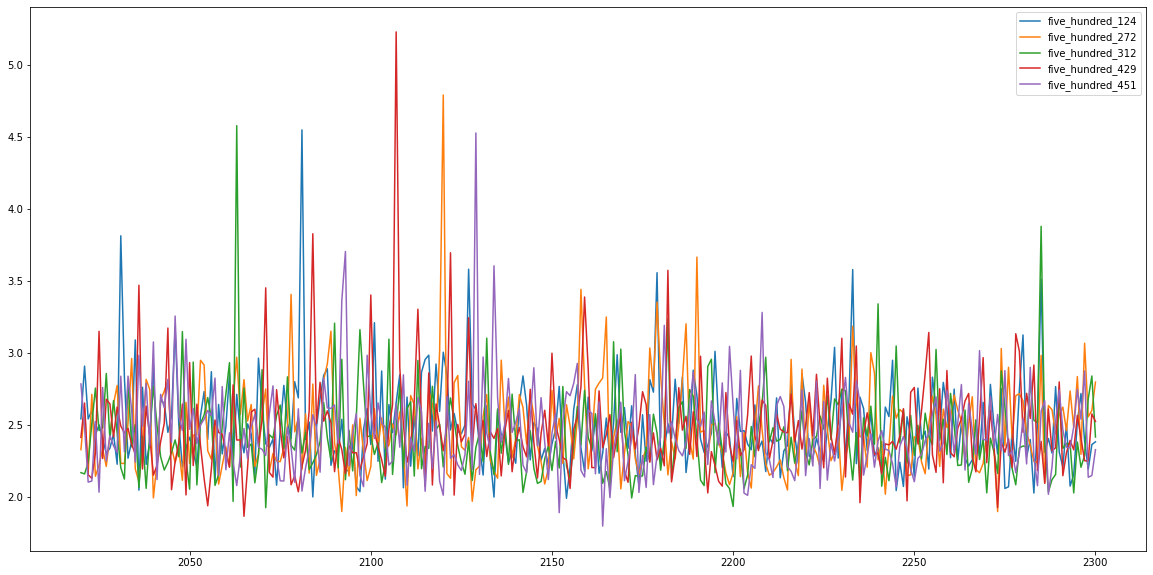

In [20]:
fig,ax = plt.subplots(1,1,figsize=(20,10))
for SH in selected_SH:
    ax.plot(SH.years,SH.surgeheight,label=SH.name)
    ax.legend()

# Let's explore how these transients look like in the model

In [3]:
foldername = "temp"
subfolder = "experiments"
target = os.path.join(foldername,subfolder)

experiments, outcomes = load_results(os.path.join(target,"2020_10_15_EMA_experiments_five_hundred_biased.tar.gz"))
experiments.head(n=3)

,Housing_market,SLR,implementation_time,transient,Mayor,scenario,policy,model
0,rational,5,12,SurgeHeight\biased_from_five_hundred\five_hund...,H. Economicus,4,4,Rotty
1,boundedly_rational,1,8,SurgeHeight\biased_from_five_hundred\five_hund...,H. Economicus,5,4,Rotty
2,rational,8,5,SurgeHeight\biased_from_five_hundred\five_hund...,H. Economicus,6,4,Rotty


In [4]:
experiments2 = experiments.drop(['policy','model'],axis=1)
experiments2.head(n=3)

,Housing_market,SLR,implementation_time,transient,Mayor,scenario
0,rational,5,12,SurgeHeight\biased_from_five_hundred\five_hund...,H. Economicus,4
1,boundedly_rational,1,8,SurgeHeight\biased_from_five_hundred\five_hund...,H. Economicus,5
2,rational,8,5,SurgeHeight\biased_from_five_hundred\five_hund...,H. Economicus,6


In [5]:
experiments3 = experiments2.copy()
map_house_market = {'rational' : 0, 
             'boundedly_rational' :1}
map_mayor = {'H. Economicus': 2,
             'Sentiment' : 1,
             'R. Active' : 0,
             'Lawkeeper' : 3}

experiments3['Housing_market'].replace(map_house_market,inplace=True)
experiments3['Mayor'].replace(map_mayor,inplace=True)
experiments3['transient'] = experiments3['transient'].apply(lambda s : int(s.split('_')[-1].split('.')[0]))
experiments3[['Housing_market', 'SLR', 'transient', 'Mayor']].astype('float')
experiments3.head(n=3)

,Housing_market,SLR,implementation_time,transient,Mayor,scenario
0,0,5,12,35,2,4
1,1,1,8,8,2,5
2,0,8,5,21,2,6


In [6]:
pd.DataFrame(outcomes)['CC_first_SETP'].unique()

array([9999, 2095, 2085, 2097, 2136, 2186, 2087, 2135, 2114, 2081, 2098,
       2088, 2086, 2082, 2089, 2084, 2115, 2175, 2112, 2119, 2094, 2110,
       2108, 2091, 2124, 2148, 2083, 2120, 2182, 2181, 2090, 2128, 2078,
       2179, 2185, 2099, 2149, 2118, 2093, 2077, 2207, 2199, 2092, 2183,
       2111, 2096, 2100, 2126, 2187, 2116, 2107, 2079, 2132, 2150, 2145,
       2109, 2074, 2195, 2123, 2201, 2138, 2129, 2188, 2180, 2165, 2194,
       2178, 2158, 2080, 2161, 2101, 2102, 2127, 2162, 2146, 2075, 2134,
       2191, 2215, 2156, 2164, 2133, 2160, 2130, 2189, 2184, 2125, 2154,
       2166, 2113, 2143, 2104, 2105, 2167, 2217, 2177, 2211, 2103, 2168,
       2170, 2171, 2208, 2153, 2106, 2139, 2152, 2151, 2147, 2174, 2173,
       2137, 2190, 2157, 2214, 2159, 2209, 2219, 2210, 2206, 2202, 2141,
       2203, 2172, 2163, 2155, 2205, 2140, 2176, 2196, 2122], dtype=int64)

In [7]:
from datetime import datetime

#CREATE SUBFOLDER IN VISUALISATION WITH CURRENT DATE
today = datetime.date(datetime.now())
date = "{}_{}_{}".format(today.year,today.month,today.day)
foldername = date
target = os.path.join('Visualisations',foldername)
if not os.path.exists(target):
    os.mkdir(target)
else:
    print("Target folder {} already exists".format(target))

### Feature scoring

C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\urban-SETP\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive "


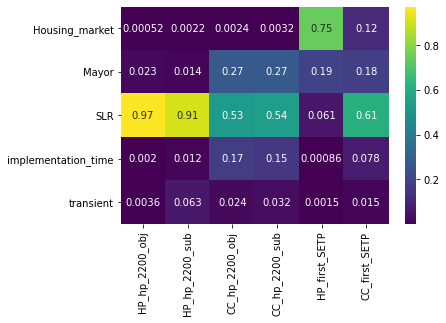

In [8]:
from ema_workbench.analysis import feature_scoring
x = experiments3
y = outcomes

fs = feature_scoring.get_feature_scores_all(x, y)
sns.heatmap(fs, cmap='viridis', annot=True)

In [10]:
map_mayor
invert_map_mayor = {}

for key,value in map_mayor.items():
    invert_map_mayor[value] = key
invert_map_mayor

{2: 'H. Economicus', 1: 'Sentiment', 0: 'R. Active', 3: 'Lawkeeper'}

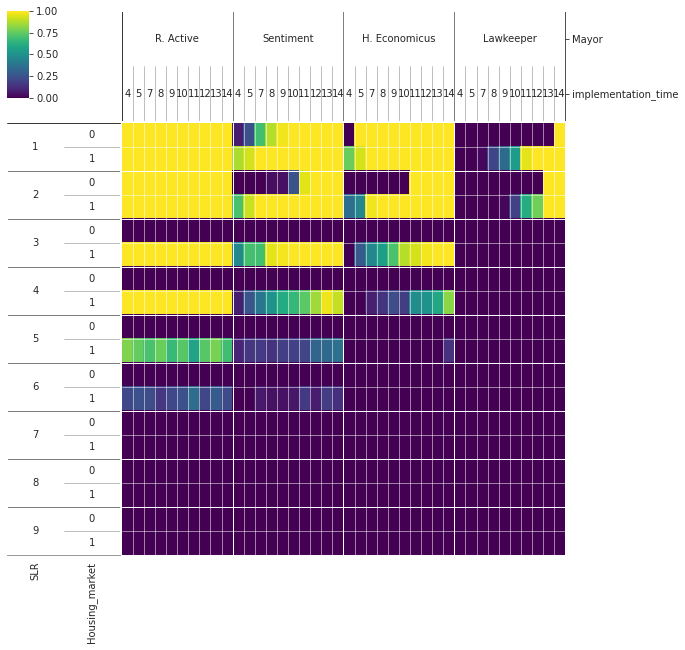

In [11]:
from ema_workbench.analysis import dimensional_stacking

x = experiments3
y = outcomes['CC_first_SETP'] <2200
#y = outcomes['CC_first_SETP'] 

fig = dimensional_stacking.create_pivot_plot(x,y, nr_levels=2, nbins=4,categories=True)

horizontal_texts = fig._axstack._elements[2][1][1].texts
for i,text in enumerate(horizontal_texts):
    if i % 11 == 0: #it's a mayor text
        text._text = invert_map_mayor[i//11]
        
    else:
            values = [4,5,7,8,9,10,11,12,13,14]
            index = int(text._text)-1
            text._text = str(values[index])
fig.savefig(fname=os.path.join(target,'dimstack_impl_time_five_hundred_biased.png'),bbox_inches='tight',dpi=150)

In [13]:
experiments3

,Housing_market,SLR,implementation_time,transient,Mayor,scenario
0,0,5,12,35,2,4
1,1,1,8,8,2,5
2,0,8,5,21,2,6
3,0,3,12,37,2,7
4,1,9,9,44,2,8
...,...,...,...,...,...,...
35995,1,5,9,4,3,8999
35996,0,5,10,19,3,9000
35997,1,9,9,3,3,9001
35998,0,7,12,24,3,9002


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

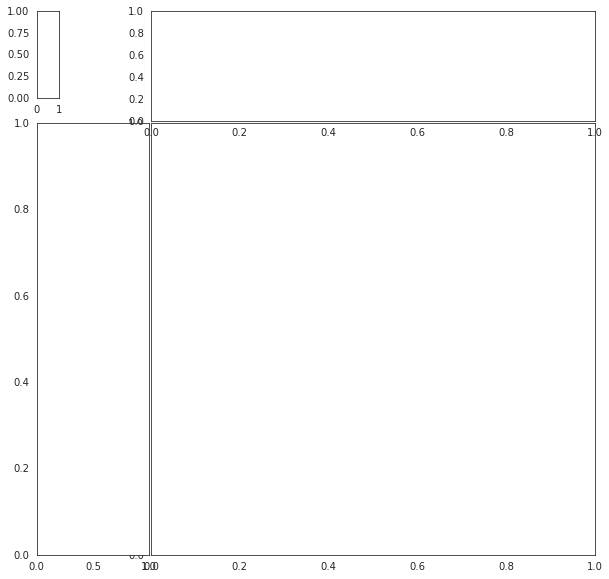

In [12]:
from ema_workbench.analysis import dimensional_stacking

x = experiments3
y = outcomes['CC_first_SETP'] <2200
#y = outcomes['CC_first_SETP'] 

fig = dimensional_stacking.create_pivot_plot(x,y, nr_levels=3, nbins=4,categories=True)